In [3]:
from bs4 import BeautifulSoup
import requests
from random import randint
import time
import pandas as pd
import nltk
import collections
from collections import Counter
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
from string import digits
ps = PorterStemmer()
import math
from PIL import Image
from IPython.display import Image
from os import path
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Scraping

In this part we are extracting links from _www.immobiliare.it_

Since our computer take too much time for extracting the data we had to reduce the pages that we want to scrap.

In [4]:
url_list=[]
for page in range(1,30):
    resp = requests.get('https://www.immobiliare.it/vendita-case/roma/?criterio=rilevanza&pag='+str(page))
    txt = resp.text
    soup = BeautifulSoup(txt, 'lxml')
    
    # Pause the loop
    time.sleep(randint(1,3))
    for link in soup.find_all('a',href=True,title=True, id=True):
        url_list.append(link['href'])

In [5]:
url_list[:10]

['/nuove_costruzioni/Roma/142255-immobile.html',
 'https://www.immobiliare.it/53131931-Vendita-Bilocale-viale-Italo-Calvino-Roma.html',
 'https://www.immobiliare.it/70086882-Vendita-Appartamento-piazza-San-Giovanni-di-Dio-39-Roma.html',
 'https://www.immobiliare.it/70084602-Vendita-Trilocale-piazza-San-Giovanni-di-Dio-39-Roma.html',
 'https://www.immobiliare.it/70085950-Vendita-Trilocale-piazza-San-Giovanni-di-Dio-Roma.html',
 'https://www.immobiliare.it/70085670-Vendita-Bilocale-piazza-San-Giovanni-di-Dio-39-Roma.html',
 'https://www.immobiliare.it/70085240-Vendita-Trilocale-piazza-San-Giovanni-di-Dio-39-Roma.html',
 'https://www.immobiliare.it/70100018-Vendita-Quadrilocale-piazza-San-Giovanni-di-Dio-39-Roma.html',
 'https://www.immobiliare.it/70100304-Vendita-Attico-Mansarda-piazza-San-Giovanni-di-Dio-39-Roma.html',
 'https://www.immobiliare.it/53973750-Vendita-Trilocale-via-Maso-Finiguerra-27C-D-Roma.html']

Now we want to scrap the data from each link of our url_list, by doing this we are using the class of each section to find our attributes(titles, descriptions, prices, locali, sup, bath, piano).

In [6]:
titles = []
descriptions = []
prices = []
locali = []
sup = []
bath = []
piano = []
for item in url_list:
    try:
        page1 = requests.get(item)
        soup = BeautifulSoup(page1.content, 'html.parser')
        check = soup.find_all('span',attrs = {'class':'text-bold'})[0].get_text()
        if "€" in check:
            a=soup.find_all('h1',attrs = {'class':'raleway title-detail'})[0].get_text()
            b=soup.find_all('div',attrs = {'class':'col-xs-12 description-text text-compressed'})[0].get_text()
            c=soup.find_all('li' ,attrs={'class':'features__price'})[0].get_text()
            d=soup.find_all('span',attrs = {'class':'text-bold'})[1].get_text() 
            e=soup.find_all('span',attrs = {'class':'text-bold'})[2].get_text()
            f=soup.find_all('span',attrs = {'class':'text-bold'})[3].get_text()
            g=soup.find_all('abbr',attrs = {'class':'text-bold im-abbr'})[0].get_text()
            b=b.replace("\n","")
            c=c.replace("€","").replace('.','').replace(' ','')
            d=d[0]
            f=f[0]
            g=g.replace("\n","").replace("T","0")
            g=g[0]
            titles.append(a)
            descriptions.append(b)
            prices.append(c)
            locali.append(d)
            sup.append(e)
            bath.append(f)
            piano.append(g)
        else:
            a=soup.find_all('h1',attrs = {'class':'raleway title-detail'})[0].get_text()
            b=soup.find_all('div',attrs = {'class':'col-xs-12 description-text text-compressed'})[0].get_text()
            c=soup.find_all('li' ,attrs={'class':'features__price'})[0].get_text()
            d=soup.find_all('span',attrs = {'class':'text-bold'})[0].get_text() 
            e=soup.find_all('span',attrs = {'class':'text-bold'})[1].get_text()
            f=soup.find_all('span',attrs = {'class':'text-bold'})[2].get_text()
            g=soup.find_all('abbr',attrs = {'class':'text-bold im-abbr'})[0].get_text()
            b=b.replace("\n","")
            c=c.replace("€","").replace('.','').replace(' ','')
            d=d[0]
            f=f[0]
            g=g.replace("\n","").replace("T","0")
            g=g[0]
            titles.append(a)
            descriptions.append(b)
            prices.append(c)
            locali.append(d)
            sup.append(e)
            bath.append(f)
            piano.append(g)

    except:
            next
    
print ("End : %s" % time.ctime())

End : Tue Dec 11 21:22:08 2018


In [7]:
# making a list tuples in order to use it for making the dataframe
data = list(zip(titles, prices, locali, sup, bath, piano, descriptions))

In [12]:
data[:2]

[('Bilocale viale Italo Calvino, Roma',
  '225000',
  '2',
  '50',
  '1',
  '1',
  '                                PAPILLO EUR in elegante complesso residenziale rifinitissimo bilocale composto da soggiorno con angolo cottura, stanza da letto bagno e ampio balcone . con Rifiniture di pregio, pavimenti in parquet / grees, infissi in legno con vetro camera e porte in noce, grate nel salone, riscaldamento termoautonomo con caldaia centralizzata, aria condizionata, videocitofono, porta blindata, serramenti elettrici con chiusura centralizzata, antenna satellitare, isolamento termo acustico, pannelli solari e fotovoltaici , rilevatori elettronici di gas. Tutte le camere sono fornite di impianto antifurto, presa antenna satellitare e presa telefonica.ORARI lunedi chiusi martedi 10:00-17:00 mercoledi 10:00-17:00giovedi 10:00-17:00venrdi 10:00-17:00sabato 10:00-17:00 domenica 10:00-13:00            '),
 ('Appartamento piazza San Giovanni di Dio 39, Roma',
  '669000',
  '5',
  '86',
  '2',
  '

In [13]:
# making a dataframe of data
df = pd.DataFrame(data, columns = ['Title','Prices','Locals','Area','Bath','Floor','Description'])
pd.set_option('display.max_colwidth', -1)

Now we convert attribute's values to numeric

In [14]:
df['Prices'] = pd.to_numeric(df['Prices'], errors='coerce')
df['Locals'] = pd.to_numeric(df['Locals'], errors='coerce')
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')
df['Bath'] = pd.to_numeric(df['Bath'], errors='coerce')
df['Floor'] = pd.to_numeric(df['Floor'], errors='coerce')

Since we converted the cells to numeric, so the cells associated with letters(instead of numbers) automatically have been converted to nan value, so those cells should be dropped. (we dropped nan cells)

In [15]:
df = df.dropna(axis=0, how='any')
df = df.reset_index(drop=True)

## Datasets

### 1) Information

In [17]:
information_df = df.drop(['Title','Description'], axis=1)
information_df.index.name = 'Announcement'

In [18]:
information_df.head()

,Prices,Locals,Area,Bath,Floor
Announcement,,,,,
0,225000.0,2,50,1.0,1.0
1,669000.0,5,86,2.0,4.0
2,500000.0,3,89,2.0,3.0
3,425000.0,3,72,2.0,4.0
4,300000.0,2,46,1.0,4.0


In [19]:
def text_formating(des):
    
    des=des.strip()
    des=des.replace("\\n", " ").replace("/", " ").replace("-", " ").replace("’",' ')
    
    # Punctuation
    custom_punctuation = string.punctuation
    custom_punctuation = custom_punctuation + '“' + '–'
    for char in custom_punctuation:
        des = des.replace(char, ' ')
        
    # Split into list.
    des = des.lower()
    des = des.split(" ")

    # Remove stop words.
    des = [word for word in des if not word in set(stopwords.words('italian'))]

    # Perform the stemming process.
    des = [ps.stem(word) for word in des]

    # Rejoin line text  
    des = " ".join(des)
    
    #remove digits 
    des=''.join(i for i in des if not i.isdigit())
    des=des.replace('  ',' ')
    
    return des

making the vocabulary list from descriptions.

In [20]:
vocabulary=[]
for des in range(len(df)):
    clean_des=text_formating(df['Description'][des])
    clean_des=clean_des.split(' ')
    for word in clean_des:
        vocabulary.append(word)

In [21]:
vocabulary[1:10]

['eur',
 'elegant',
 'complesso',
 'residenzial',
 'rifinitissimo',
 'bilocal',
 'composto',
 'soggiorno',
 'angolo']

In [22]:
# we want to remove duplicate ones
vocabulary = list(set(vocabulary[1:]))

we make 2 dictionaries in order to build _tfidf_ dataframe

In [23]:
Dict = {}
Inv_Dict = {}
for des in range(len(df)):
    clean_des=text_formating(df['Description'][des])
    clean_des=clean_des.split(' ')
    for i in set(clean_des):
        if i not in Dict:
            Inv_Dict[len(Dict)]=[str(des)]
            Dict[i]=len(Dict)        
        else:
            Inv_Dict[Dict.get(i)].append(str(des))

computing _tfidf_ for each word in our vocabulary list

In [24]:
n = len(df)
tfidf_word_dict = {}
for des in range(len(df)):
    clean_des=text_formating(df['Description'][des])
    clean_des=clean_des.split(' ')
    counter = Counter(clean_des)
    for word in vocabulary:
        tf = counter[word]/len(clean_des)
        Nj=len(Inv_Dict[(Dict[word])])
        Idfj=math.log10(n/Nj)
        
        tfidf = tf*Idfj
        if des not in tfidf_word_dict.keys():
            tfidf_word_dict[des] = [tfidf]
        else:
            tfidf_word_dict[des].append(tfidf)

### 2) Description

Once we had the _tfidf_ dictionary, we can build our second dataframe. 

In [25]:
description_df = pd.DataFrame(list(tfidf_word_dict.values()), columns = [word for word in vocabulary])
description_df.index.name = 'Announcement'

In [26]:
description_df.head()

,,baldovinetti,quintili,complessosono,paci,usato,piscina,nd,acceso,abbondano,...,mit,complex,padr,rinunciar,affinché,cose,orti,fermi,ergif,coppia
Announcement,,,,,,,,,,,,,,,,,,,,,
0,0.002575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.001101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Clustering for the first matrix


First of all we use together the k_means clustering with the Elbow Method to determine what is the proper number of clusters for the first dataset **information_df**. 

We’ll plot:

1) values for K on the horizontal axis

2) a scoring method on the Y axis: the distorsions (the values calculated with the cost function), inertia (Sum of distances of samples to their closest cluster center), BIC etc..


When K increases, the centroids are closer to the clusters centroids.
The improvements will decline, at some point rapidly, creating the elbow shape.
That point is the optimal value for K. 

We decide to do the same analysis with two times of scoring methods: one based on distorsion and the other one based on the inertia, to see if there are similiar results.

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


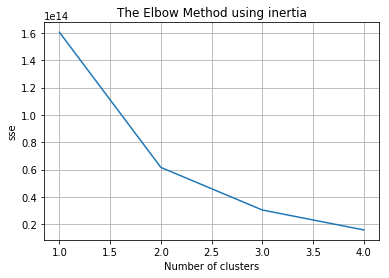

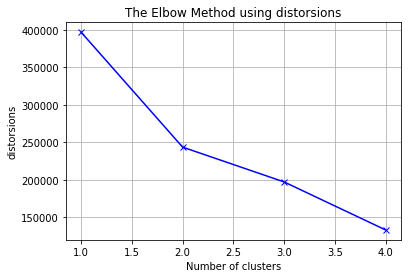

In [27]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage 
from scipy.cluster import hierarchy
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sse = {}
distortions = []
K = range(1,len(information_df.columns))
for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state = 0).fit(information_df)
    kmeanModel.fit(information_df)
    distortions.append(sum(np.min(cdist(information_df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / information_df.shape[0])
    sse[k] = kmeanModel.inertia_
sse_method = plt.figure(1)
plt.plot(list(sse.keys()), list(sse.values()))
# plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('sse') # Inertia: Sum of distances of samples to their closest cluster center
plt.grid(True)
plt.title('The Elbow Method using inertia')
sse_method.show()

distorsion_method = plt.figure(2)
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('distorsions') # Inertia: Sum of distances of samples to their closest cluster center
plt.grid(True)
plt.title('The Elbow Method using distorsions')
distorsion_method.show()


The number of clusters chosen as starting point is due to the user's will. We decide to start from 6 clusters because the unlikely situation is that for which each variable represents an isolate cluster; we are also supposing that the final number of clusters will be related to the most (perhaps) influent variable in this kind of analysis that is the **PRICE** and in particular to its different ranges. 
As said before, two scoring methods have been used to build the Elbow-graph just to compare the results, that are:

1) **SSE(Inertia)** = optimal number of clusters equal to 2 but also 3 could be accepted, we look later to the dendrogram.

2) **Distorsion** = optimal number of clusters equal to 2.

In [28]:
clmns = ['Prices', 'Locals','Area', 'Bath','Floor']
kmeans_information = KMeans(n_clusters=3, random_state=0).fit(information_df)
centers_information = kmeans_information.cluster_centers_
labels_information = kmeans_information.labels_
#Glue back to originaal data
information_df['clusters'] = labels_information


#Add the column into our list
clmns.extend(['clusters'])

#Lets analyze the clusters
mean_of_cluster1 = information_df[clmns].groupby(['clusters']).mean()


,Prices,Locals,Area,Bath,Floor
clusters,,,,,
0,3.751464e+05,3.284182,102.482574,1.584450,2.203753
1,1.236991e+06,4.752294,215.449541,2.587156,2.724771
2,3.192000e+06,5.000000,331.200000,2.800000,3.100000


## Visualization through dendrogram:



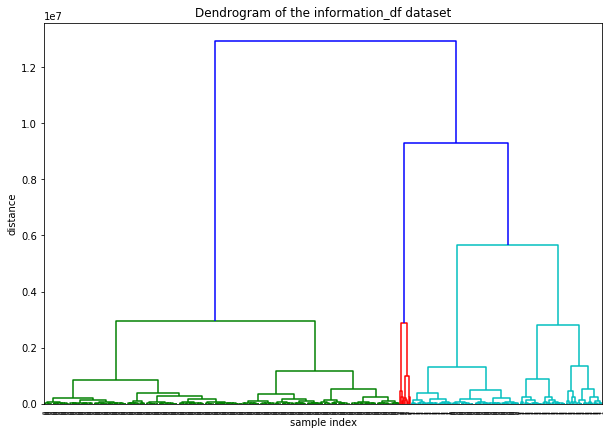

In [29]:
linked = linkage(information_df, 'ward')


plt.figure(figsize=(10, 7))
plt.title('Dendrogram of the information_df dataset')
plt.xlabel('sample index')
plt.ylabel('distance')
#plt.axhline(y = 0.5)


dendrogram(linked,  
            orientation='top',
            labels= labels_information,
            distance_sort='descending',
            show_leaf_counts=True)

plt.show()

Giving a look at the dendrogramm it suggests the presence of **3** clusters cutting at level ~0.5. So we decide to accept the method based on SSE and its result equal to 3.

*Repeating the analysis with the optimal value of k = 3 (the simplest one)*

The clustering has been repeated with the optimal value of k this time. The output shows for each variable in each clusters the mean value that it assumes.

In [ ]:
mean_of_cluster1

In [30]:
information_df.head() #to see the cluster assigned

,Prices,Locals,Area,Bath,Floor,clusters
Announcement,,,,,,
0,225000.0,2,50,1.0,1.0,0
1,669000.0,5,86,2.0,4.0,0
2,500000.0,3,89,2.0,3.0,0
3,425000.0,3,72,2.0,4.0,0
4,300000.0,2,46,1.0,4.0,0


*Giving some plots*

Text(30.7586,0.5,'Prices')

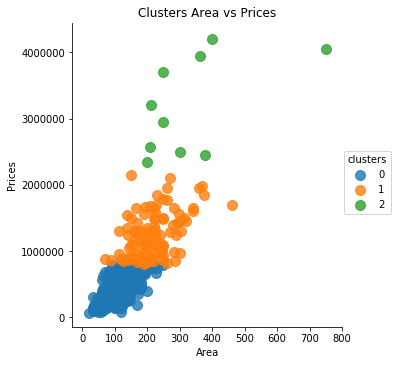

In [31]:
sns.lmplot('Area', 'Prices', 
           data=information_df, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "F", 
                       "s": 100})
plt.title('Clusters Area vs Prices')
plt.xlabel('Area')
plt.ylabel('Prices')

Since showing what happens above two-dimensional cases is difficult, we focus on airs of variables of our dataset. 
This first plot shows the 3 different groups of announcements according to the Area in relation with the Prices.

## Clustering on the whole dataset description


For this second dataset we can't take as *'worst'* situation possible a number of clusters equal to that of the attributes, because in this case the columns of our matrix are the single words for whichi the TfIdf has been computed. 
This time, the strategy is to take a random sample of the dataset (because of the big size of its columns) and to apply the clustering operation on that, choosing a quite high number of clusters that we decide to be 15.

In [32]:
new_description = description_df.sample(500, axis = 1 )
new_description.head()

,soppalchi,vender,facili,trident,riparati,cij,aperto,delvecchio,have,getrix,...,indro,liegi,vestibolo,termosifoni,risultano,ampio,quadrino,legno,ardeatino,sebastiano
Announcement,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.004526,0.0,0.010709,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.002880,0.0,0.000000,0.0,0.0


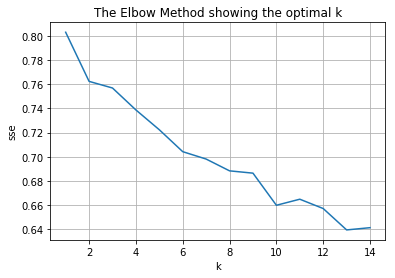

In [33]:
sse = {}
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state = 0).fit(new_description)
    kmeanModel.fit(new_description)
    sse[k] = kmeanModel.inertia_
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('k')
plt.ylabel('sse')
plt.grid(True)
plt.title('The Elbow Method showing the optimal k')
plt.show()



**Comment  on Elbow Method** = For this kind of data the Elbow Method (based on Sse) is not so precise. In fact in this case it seems to have different elbows at different level(number of clusters) in particular for k = 2 and k = 10. So we decide to choose a quantity of clusters (a sort of median) equal to **5**.
Even if t Comparing this result with the previous one (*number of clusters equal to 3*) is clear that in this case there are more clusters.

In [35]:
clmns = new_description.columns.values.tolist()

kmeans_description = KMeans(n_clusters=5, random_state=0).fit(new_description)
centers_description = kmeans_description.cluster_centers_

description_labels = kmeans_description.labels_
#Glue back to originaal data
new_description['clusters'] = description_labels

#Add the column into our list
clmns.extend(['clusters'])

### Let's see to which cluster each announcements is related.

In [41]:
new_description.head()

,fornita,sapient,scelto,garantiscono,cedri,bqti,approx,abitazioni,persian,bathroomsappart,...,seconda,esquilino,autorimessa,scimonelli,terrass,prospicienti,calda,offerti,iii,clusters
Announcement,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.008489,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.008362,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.008554,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.008489,0.0,0.0,1


### Let's see the average value of each word in the different clusters

In [36]:
mean_of_cluster2 = new_description.groupby(['clusters']).mean()
mean_of_cluster2

,soppalchi,vender,facili,trident,riparati,cij,aperto,delvecchio,have,getrix,...,indro,liegi,vestibolo,termosifoni,risultano,ampio,quadrino,legno,ardeatino,sebastiano
clusters,,,,,,,,,,,,,,,,,,,,,
0,0.000232,0.000731,0.000103,0.00013,0.000057,0.000059,0.000533,0.000041,0.000052,0.000132,...,0.000111,0.000102,0.000037,0.000032,0.000172,0.001923,0.000117,0.000959,0.000000,0.000076
1,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.001087,0.000000,0.002901,0.000000,0.000734,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.001974,0.000000,0.000665,0.001159,0.000000
3,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.001124,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.005350,0.000000,0.012658,0.000000,0.000000


## Dendrogram


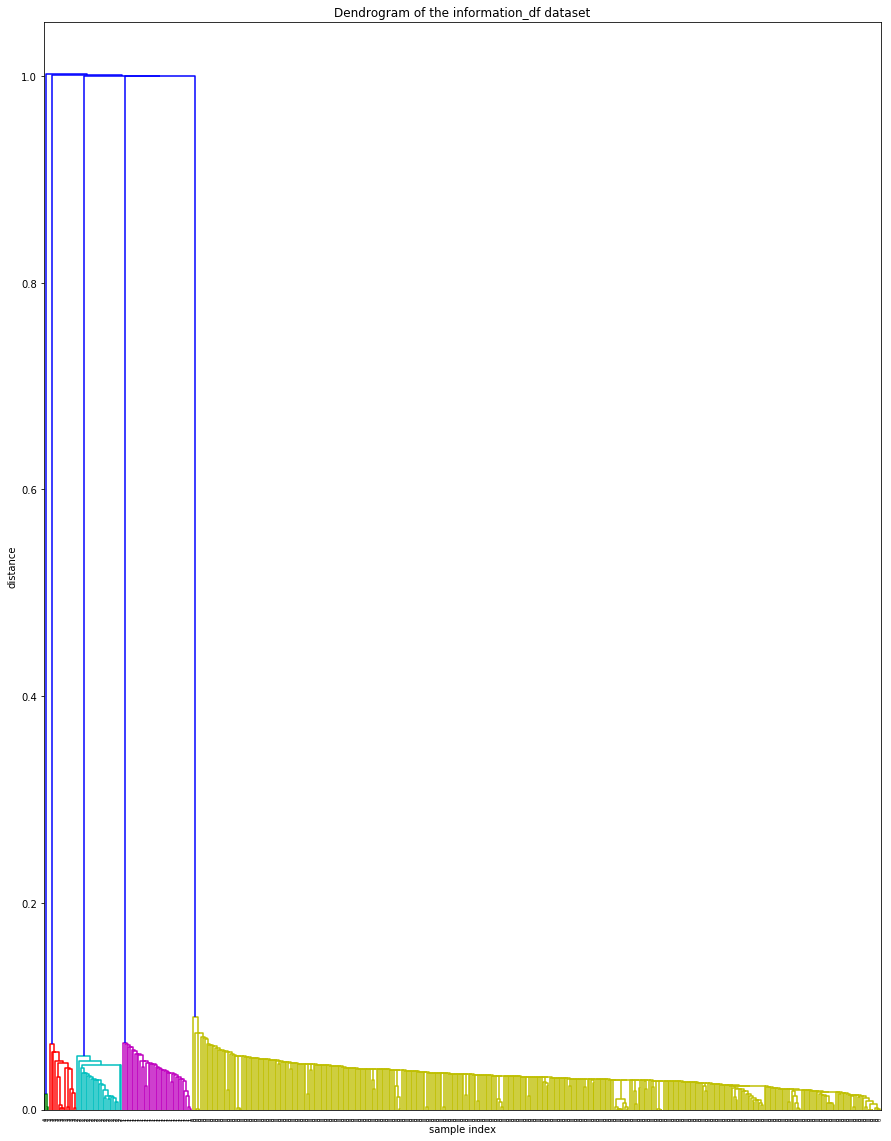

In [37]:
linked = linkage(new_description, 'single')


plt.figure(figsize=(15,20))
plt.title('Dendrogram of the information_df dataset')
plt.xlabel('sample index')
plt.ylabel('distance')
#plt.axhline(y = 0.5)


dendrogram(linked,  
            orientation='top',
            labels= description_labels,
            distance_sort='descending',
            show_leaf_counts=True)

plt.show()

First of all, let's say that for the amount of data that we have, it is difficult to build a right and well-readable dendrogram.
Since we have a huge size of data, to better show the dendrogram, we decide to zoom it, and it shows the same result of the elbow: **5 clusters are confirmed**.

## Jaccard similarity

In [38]:
def jaccard_similarity(a,b):
    A=set(a)
    B=set(b)
    return len(A.intersection(B))/len(A.union(B))

In [39]:
info_dict = {}
for item in set(information_df['clusters']):
    info_dict[item] = information_df.index[information_df['clusters'] == item].values
new_desc_dict = {}
for item in new_description.index:
    new_desc_dict[item] = new_description.index[new_description['clusters'] == item].values

In [40]:
jaccard_sim_dict={}
for i in info_dict.keys():
    for j in new_desc_dict.keys():
        jaccard_sim_dict[(i,j)]= jaccard_similarity(info_dict[i],new_desc_dict[j])

We select the 3 cluster's pairs having the highest score in jaccard similarity

In [41]:
jaccard_sim_sorted=collections.Counter(jaccard_sim_dict)
top_3=jaccard_sim_sorted.most_common(3)

In [42]:
top_3

[((0, 0), 0.6623931623931624),
 ((1, 0), 0.20093457943925233),
 ((1, 1), 0.15384615384615385)]

## Wordcloud

In [43]:
def wordcloud_function(vocab):
    plt.rcParams['figure.figsize'] = [10, 5]
    
    wordcloud = WordCloud(max_font_size=30, max_words=100, background_color="white").generate(vocab)
    plt.figure()

    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

First pair


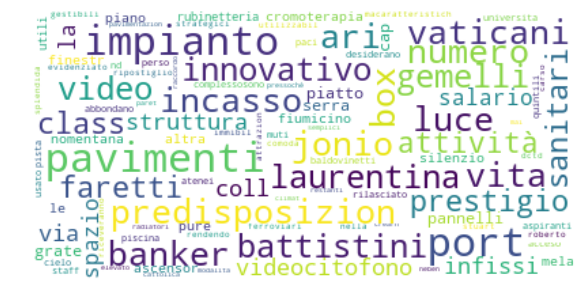

Second pair


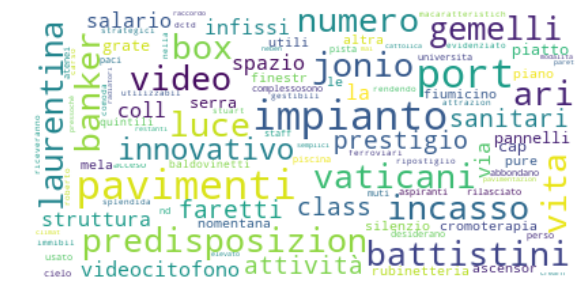

Third pair


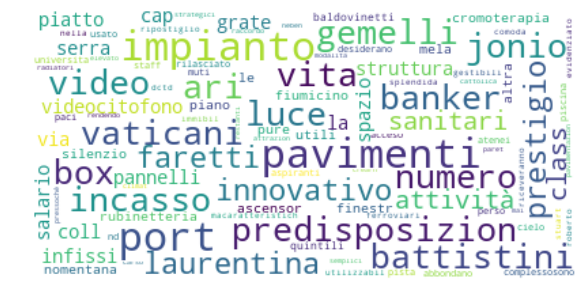

In [44]:
pairs_list=[pair[0] for pair in top_3]
title=['First pair','Second pair','Third pair']
for index,value in enumerate(pairs_list): 
    lst =list(info_dict[value[0]])
    for i in new_desc_dict[value[1]]:
        lst.append(i)
    lst = set(lst)
    new_df= df.loc[lst]
    print(title[index])
    string = ' '.join(vocabulary)
    wordcloud_function(string)